# 3 - hp refinement example using MPT-Calculator

In [1]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
import os
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)

In [2]:
from main import main

importing NGSolve-6.2.2203


## $p$ - Refinement

In this example, we wish to explore the effect of changing the polynomial order of the $\boldsymbol{H}(curl)$ discretisation. We expect that increasing the order $p$ from $p=0\rightarrow p=1\rightarrow p=2\rightarrow p=3$ will result in a more accurate simulation at the cost of an increased computational time.

For control over the order we want to specify $p$ as an input argument
```python
main(order=p)
```
which can be done iteratively


sphere.geo
generating mesh
 mesh contains 7592 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2203del
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pooler system 39/40    
 reduced order systems solved          
 frequency sweep complete
sphere.geo
generating mesh
 mesh contains 7592 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2203del
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually close

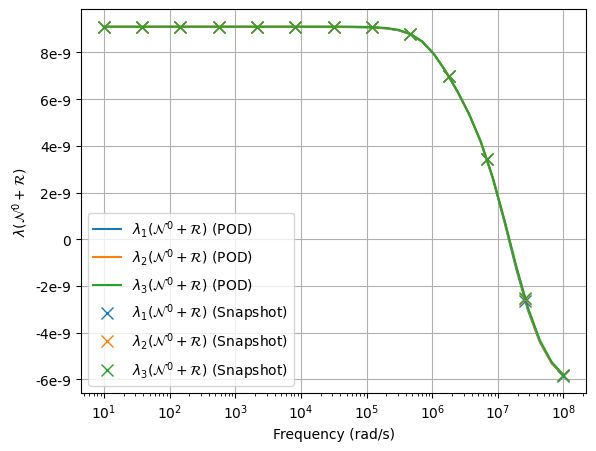

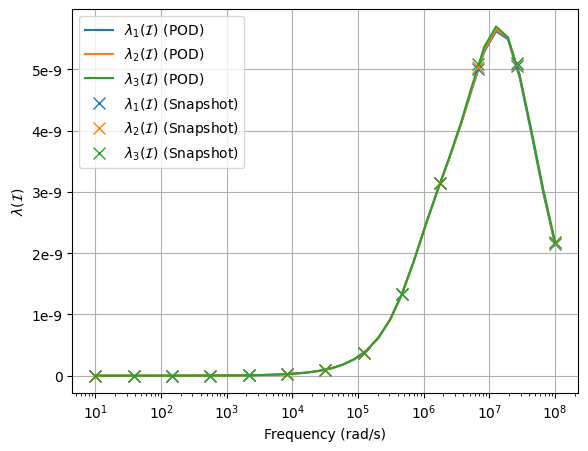

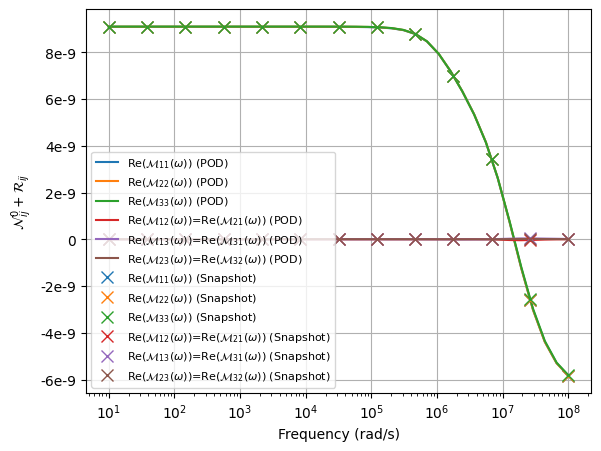

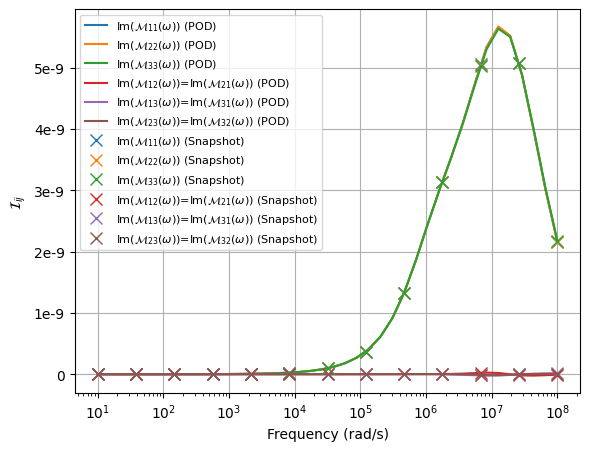

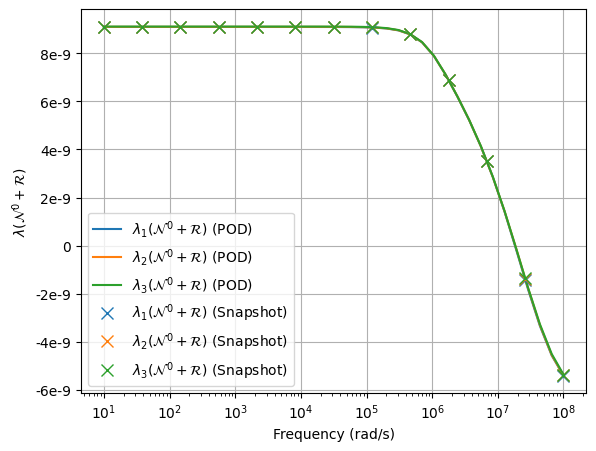

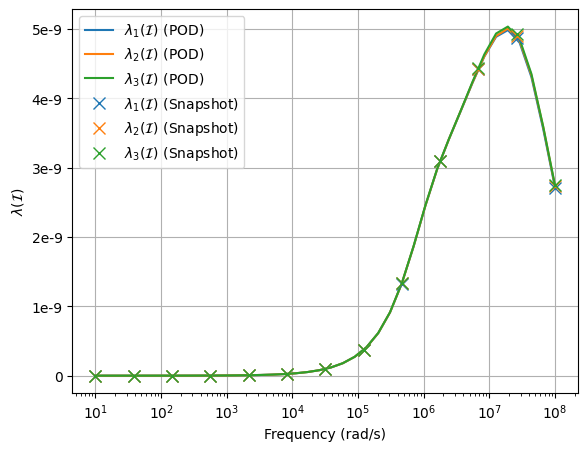

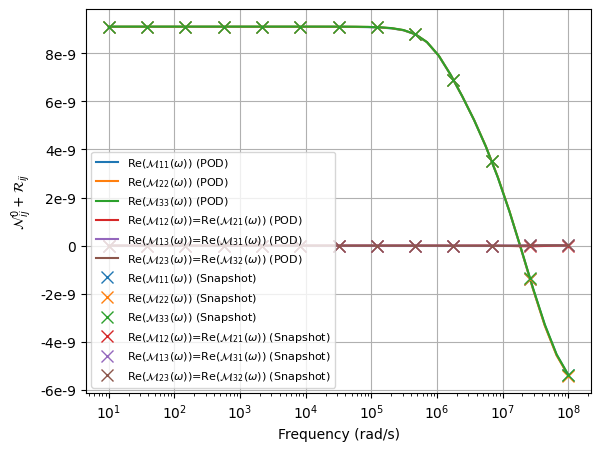

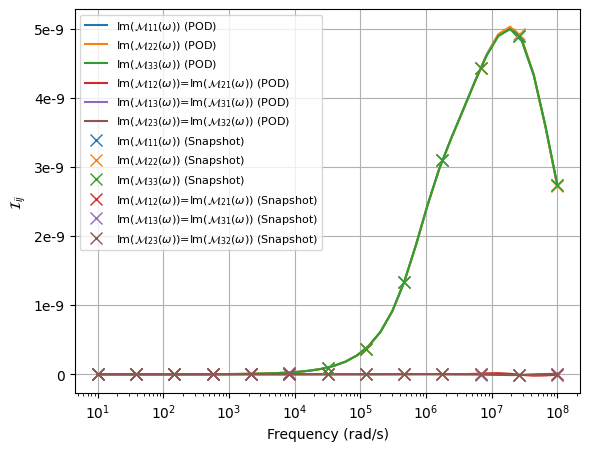

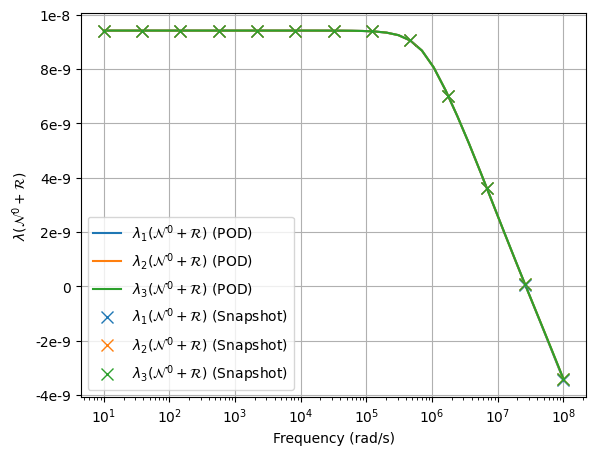

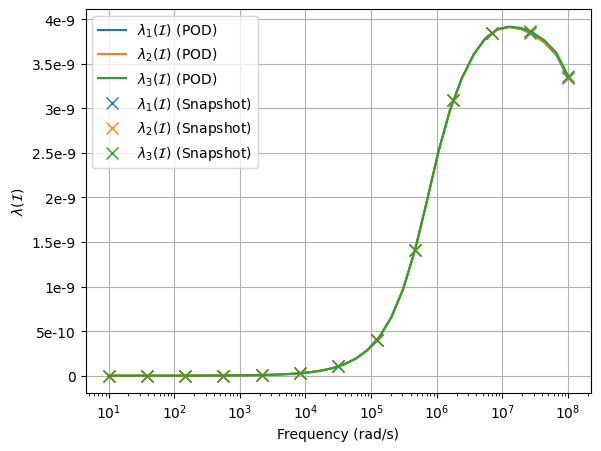

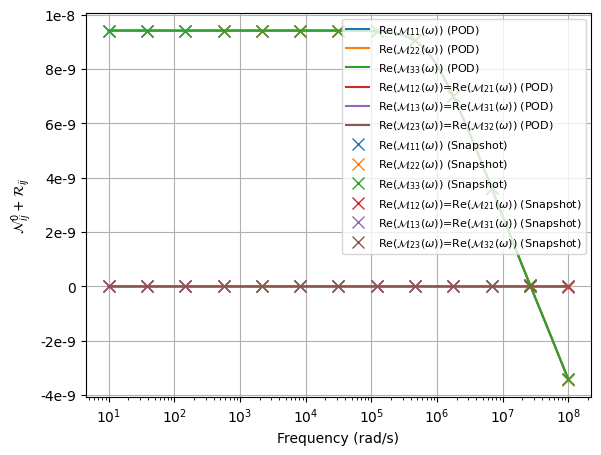

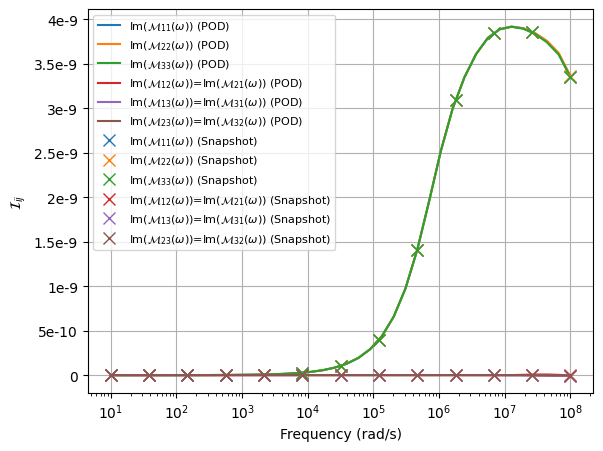

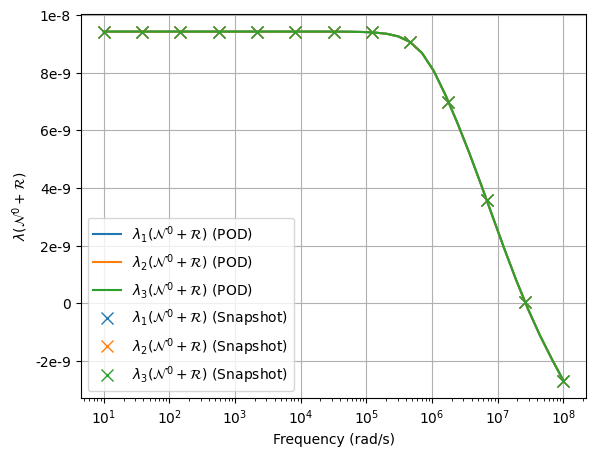

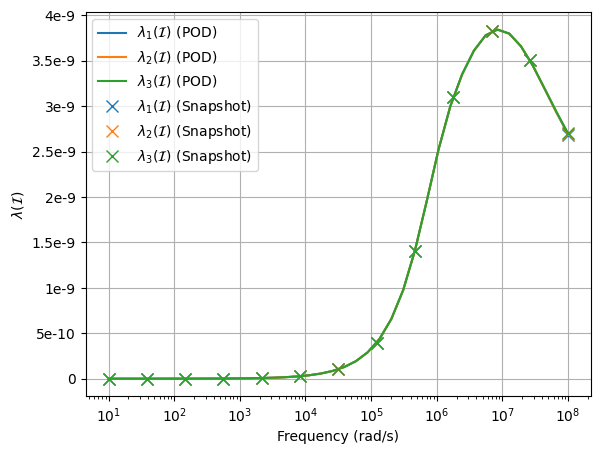

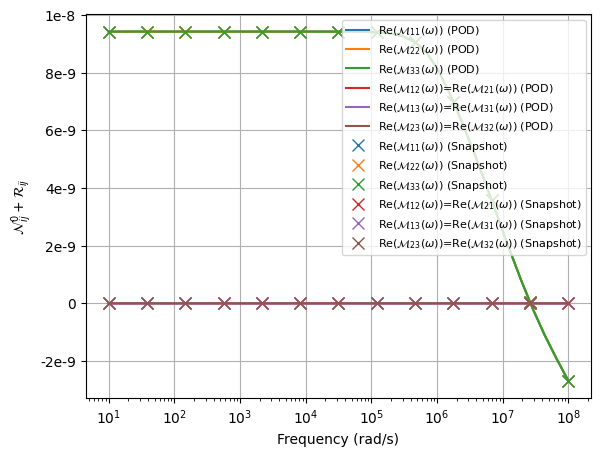

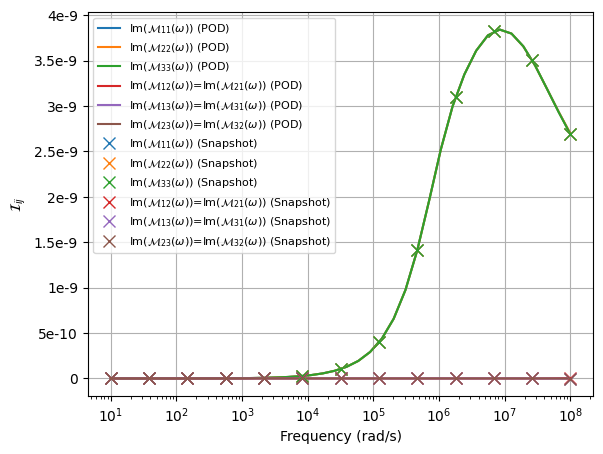

In [3]:
comparison_eig_p = np.zeros((40,4), dtype=complex)
comparison_ndofs_p = np.zeros(4)
start_time = time()
for p in [0,1,2,3]:
    Return_Dict = main(use_POD=True, order=p)
    comparison_eig_p[:,p] = Return_Dict['EigenValues'][:,0]
    comparison_ndofs_p[p] = Return_Dict['NDOF'][1]
stop_time = time()

In [4]:
print(f'Total computation time (p refinement) = {(stop_time - start_time)/60} minutes')

Total computation time (p refinement) = 2.533288033803304 minutes


Plotting the first eigenvalue for the different $p$, shows that the solutions are in agreement upto $\sim 10^6$ rad/s, after which the solutions begin to diverge.

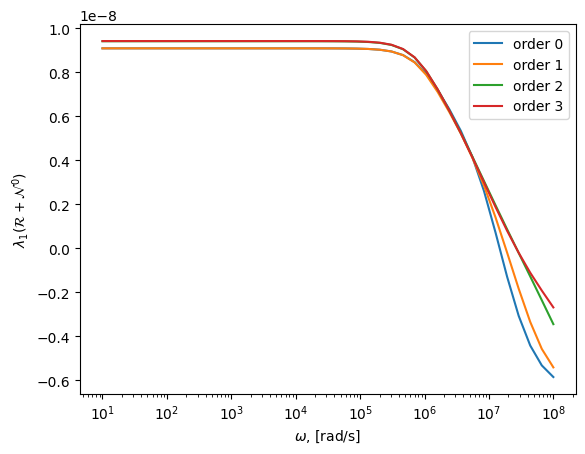

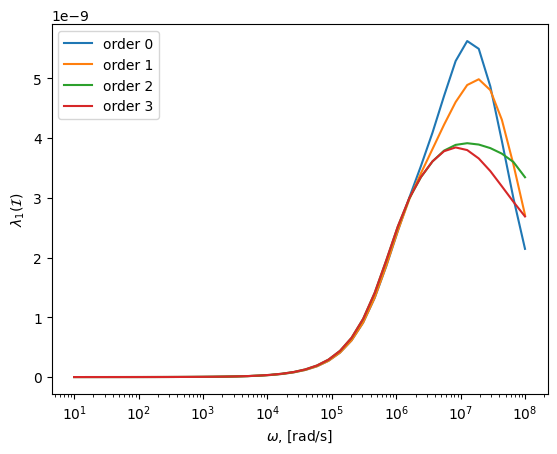

In [5]:
plt.figure()
for p in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_p[:,p].real, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{R} + \mathcal{N}^0)$');

plt.figure()
for p in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_p[:,p].imag, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');

Since orders 2 and 3 disagree, we cannot be sure that $p=3$ gives a accurate solution.

## $h$ - Refinement

Similarly to refining $p$, we can also increase the density of the mesh, to provide finer spatial resolution. In this example, we reduce the maximum element size in the mesh and observe that this provides a more accurate solution.

To set a maximum element size for a quasi-uniform mesh, we use the $\texttt{h}$ argument in $\texttt{main}$. For example, to set the max element size to 1 over the entire mesh we would use
```python
main(h=1)
```
which can also be done iterativly to generate a quasi-uniform mesh over the entire domain.

Alternativly, we can use the Netgen mesh sizing tags, $\texttt{'verycoarse'}$, $\texttt{'coarse'}$, $\texttt{'moderate'}$, $\texttt{'fine'}$, and $\texttt{'veryfine'}$ to specify a object size dependent discretisation.

e.g.
```python
main(h='coarse')
```

The mesh resulting from using $\texttt{coarse} is non-uniform.

Solving for h=verycoarse
sphere.geo
generating mesh
 mesh contains 6453 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2203del
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pooler system 39/40    
 reduced order systems solved          
 frequency sweep complete
Solving for h=coarse
sphere.geo
generating mesh
 mesh contains 7592 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2203del
importing NGSolve-6.2.2203
importing NGSolve-6.2.

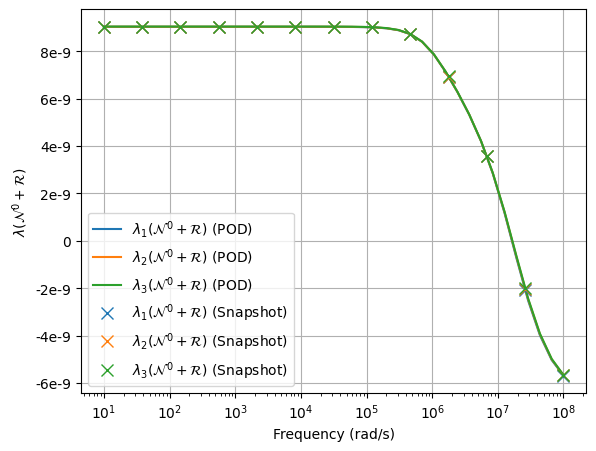

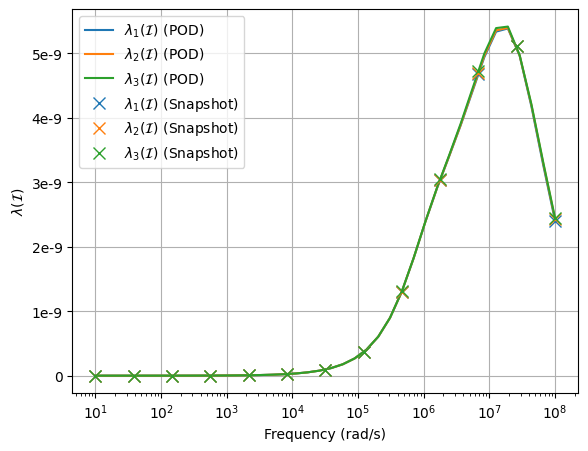

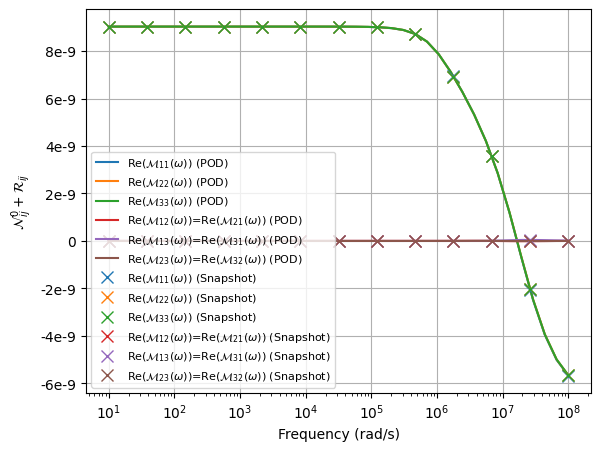

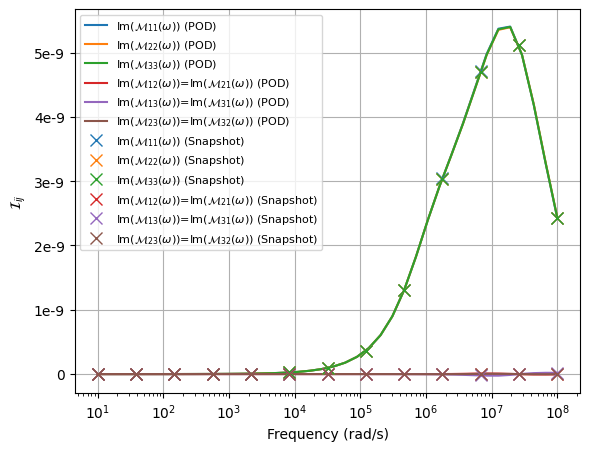

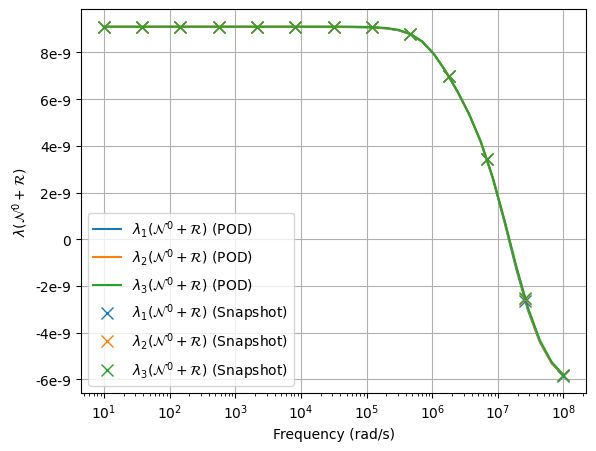

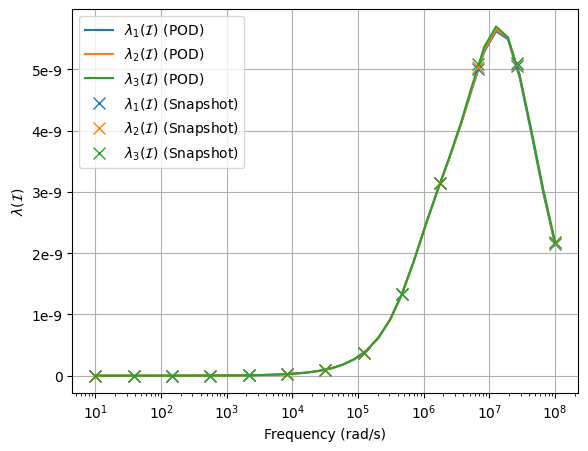

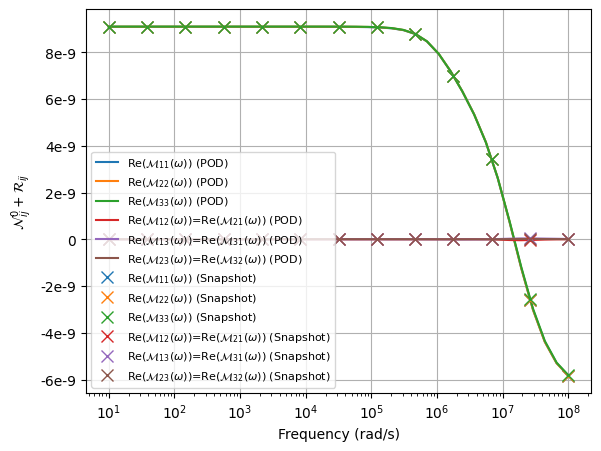

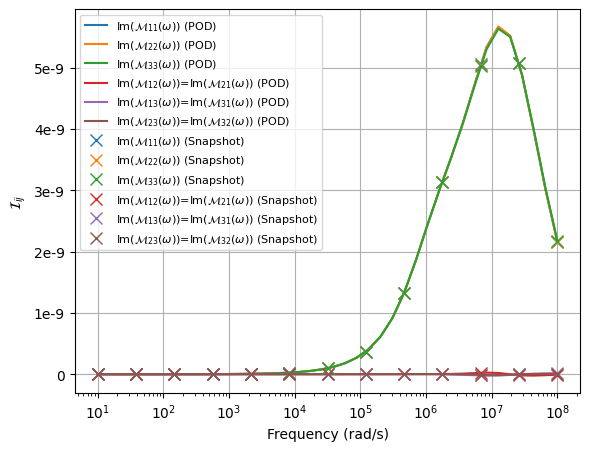

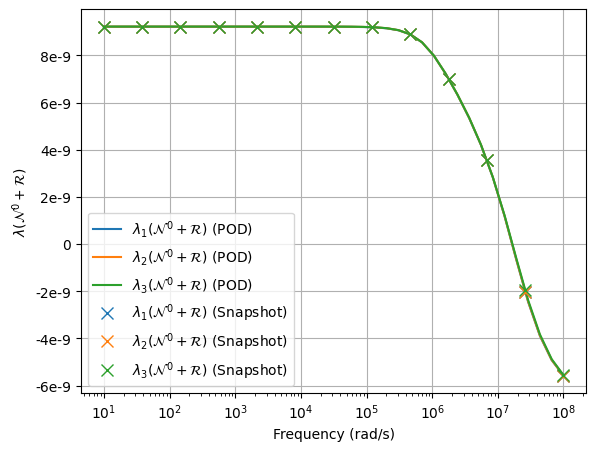

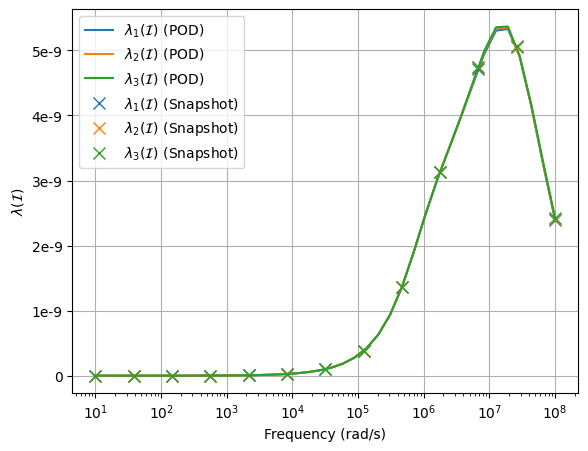

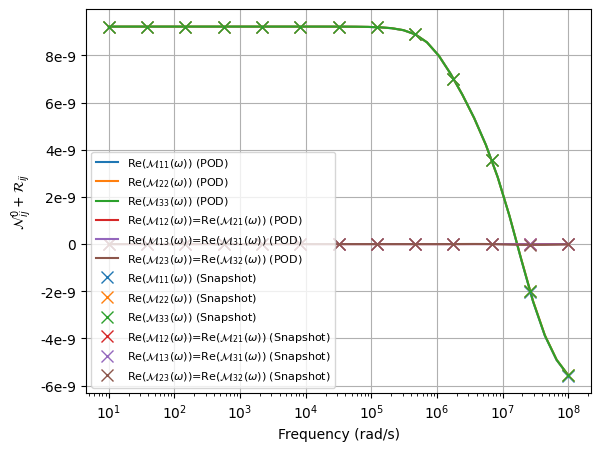

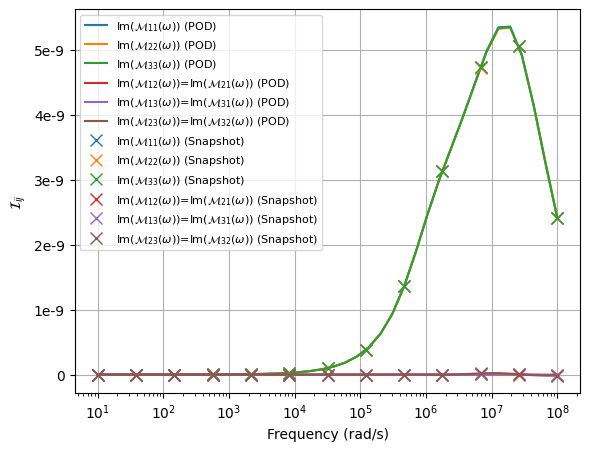

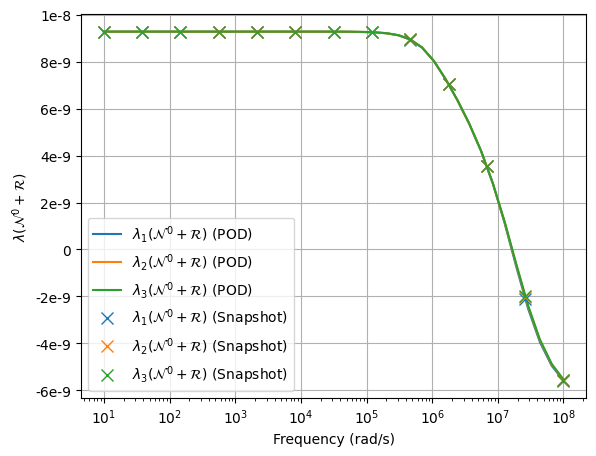

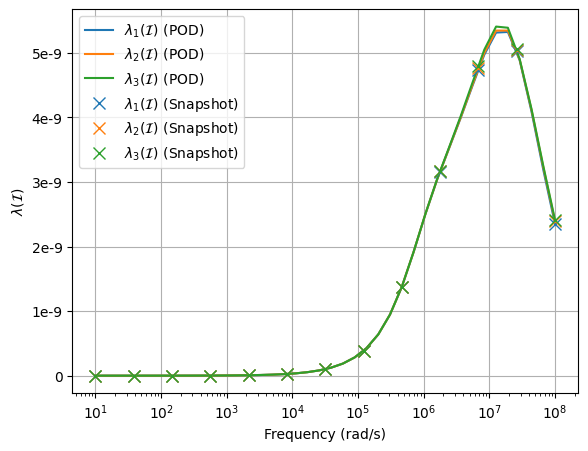

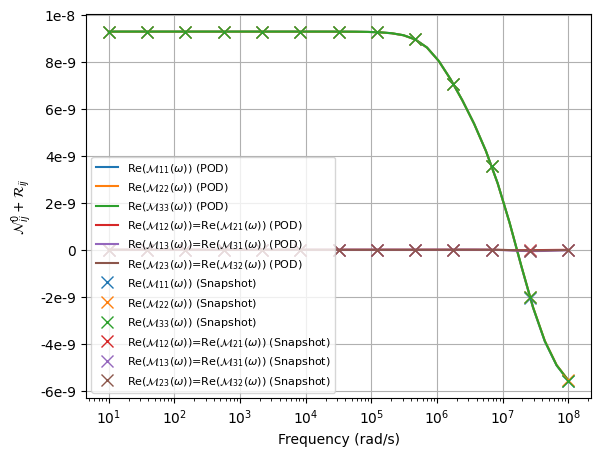

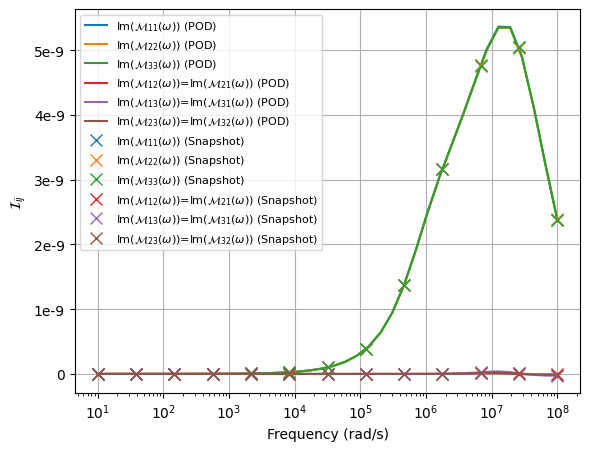

In [6]:
comparison_eig_h = np.zeros((40,4), dtype=complex)
comparison_ndofs_h = np.zeros(4)
h_array = ['verycoarse', 'coarse', 'moderate', 'fine']
start_time = time()
for n, h in enumerate(h_array):
    print(f'Solving for h={h}')
    Return_Dict = main(use_POD=True, order=0, h=h)
    comparison_eig_h[:,n] = Return_Dict['EigenValues'][:,0]
    comparison_ndofs_h[n] = Return_Dict['NDOF'][1]
stop_time = time()

In [7]:
print(f'Total computation time (h refinement) = {(stop_time - start_time)/60} minutes')

Total computation time (h refinement) = 2.9521313150723776 minutes


As before, plotting the first eigenvalue shows the effect of refining the mesh. 

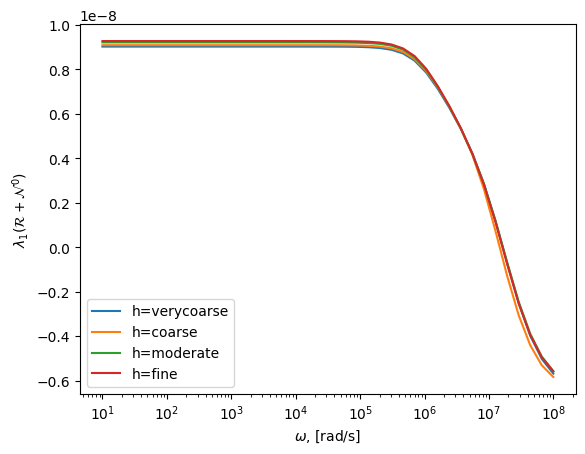

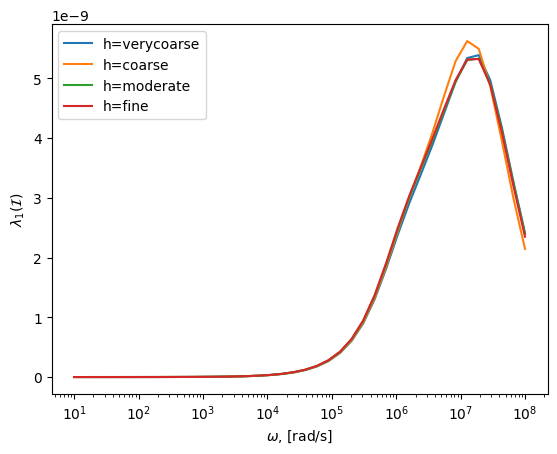

In [8]:
plt.figure()
for h in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_h[:,h].real, label=f'h={h_array[h]}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{R} + \mathcal{N}^0)$');

plt.figure()
for h in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_h[:,h].imag, label=f'h={h_array[h]}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');


Comparing the computation times for $p$ and $h$ refinements, we see that in this case $p$ refinement is significantly more effective.

We can more clearly see this benifit by plotting the approximated eigenvalues against the exact solution for a conducting permeable sphere.

<b>Note: In general, we do not have an exact solution to the rank 2 MPT for all objects, so this comparison with an exact solution only works with a sphere.</b>

In MPT-Calculator, we have a function to calculate the exact solution for a sphere.

In [9]:
from Functions.Helper_Functions.exact_sphere import exact_sphere

In [10]:
frequency_index = 39
alpha =1e-3
sigma = 1e6
mur = 10
epsilon = 0
omega = Return_Dict['FrequencyArray'][frequency_index]

exact_solution = exact_sphere(alpha, epsilon, mur, sigma, omega)

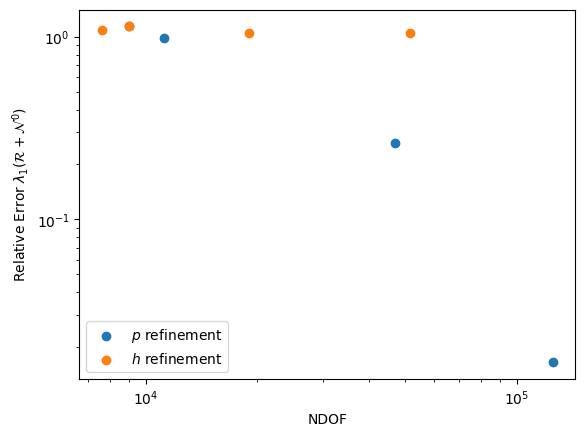

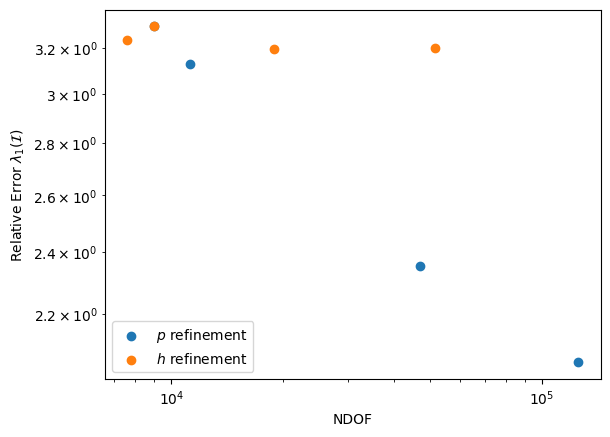

In [11]:
relative_error_real_p = np.zeros(4)
relative_error_imag_p = np.zeros(4)
relative_error_real_h = np.zeros(4)
relative_error_imag_h = np.zeros(4)

for p in [0,1,2,3]:
    relative_error_real_p[p] = np.abs((comparison_eig_p[frequency_index,p].real - exact_solution.real)) / np.abs(exact_solution.real)
    relative_error_imag_p[p] = np.abs((comparison_eig_p[frequency_index,p].real - exact_solution.imag)) / np.abs(exact_solution.imag)

for h in [0,1,2,3]:
    relative_error_real_h[h] = np.abs((comparison_eig_h[frequency_index,h].real - exact_solution.real)) / np.abs(exact_solution.real)
    relative_error_imag_h[h] = np.abs((comparison_eig_h[frequency_index,h].real - exact_solution.imag)) / np.abs(exact_solution.imag)

    
plt.figure()    
plt.scatter(comparison_ndofs_p, relative_error_real_p, label='$p$ refinement')
plt.scatter(comparison_ndofs_h, relative_error_real_h, label='$h$ refinement')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.legend(loc='lower left')
plt.ylabel('Relative Error $\lambda_1(\mathcal{R} + \mathcal{N}^0)$')
plt.xlabel('NDOF')

plt.figure()    
plt.scatter(comparison_ndofs_p, relative_error_imag_p, label='$p$ refinement')
plt.scatter(comparison_ndofs_h, relative_error_imag_h, label='$h$ refinement')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.legend(loc='lower left')
plt.ylabel('Relative Error $\lambda_1(\mathcal{I})$')
plt.xlabel('NDOF');